In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import datetime
import warnings
import itertools
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
from pylab import rcParams
warnings.filterwarnings("ignore")

In [7]:
df =pd.read_csv("E://ML//datasets//norway_new_car_sales_by_model.csv",encoding='cp1252')

In [10]:
df.head()

,Year,Month,Make,Model,Quantity,Pct
0,2007,1,Volkswagen,Volkswagen Passat,1267,10.0
1,2007,1,Toyota,Toyota Rav4,819,6.5
2,2007,1,Toyota,Toyota Avensis,787,6.2
3,2007,1,Volkswagen,Volkswagen Golf,720,5.7
4,2007,1,Toyota,Toyota Corolla,691,5.4


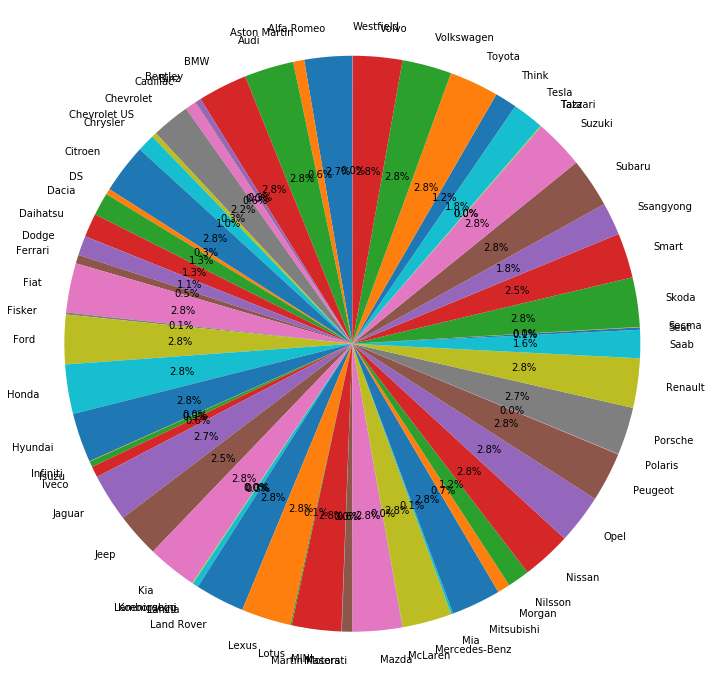

In [74]:
makes=df.groupby(['Make']).count().index
sizes=df.groupby(['Make']).count()['Quantity']


fig, ax = plt.subplots(figsize=(10,10))
ax.pie(sizes, labels=makes, autopct='%1.1f%%',
        shadow=False,  startangle=90)
ax.axis('equal')  
sizes
plt.tight_layout()

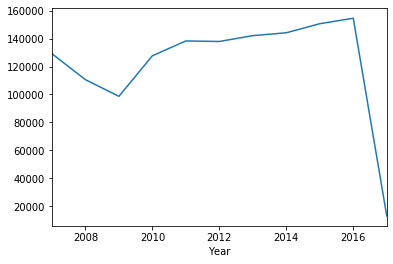

In [79]:
monthly_total_sales=df.pivot_table("Quantity",index="Year",aggfunc="sum")
monthly_total_sales.mean(axis=1).plot.line()

               Quantity
Make                   
Volkswagen       206669
Toyota           168177
Volvo             99937
Ford              99713
BMW               73315
Audi              70475
Skoda             66007
Nissan            64535
Peugeot           61033
Mercedes-Benz     57557


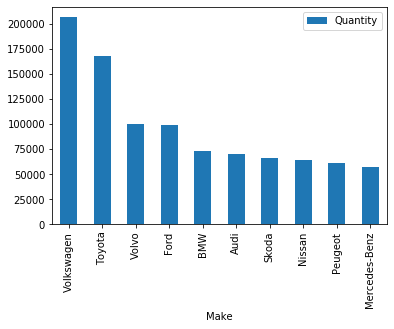

In [80]:
make_total = df.pivot_table("Quantity",index=['Make'],aggfunc='sum')
top10make=make_total.sort_values(by='Quantity',ascending=False)[:10]
print(top10make)
top10make.plot.bar()

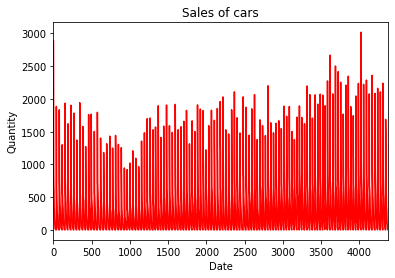

In [89]:
df['Quantity'].plot(color='red')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Sales of cars')
plt.show()

In [15]:
df1 =pd.read_csv("E://ML//datasets//norway_new_car_sales_by_month.csv",encoding='cp1252')
df1.head()


,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
0,2007,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN
1,2007,2,9793,2448,1992,-89,NaN,NaN,156,159,155,7222,73.7,47.4,NaN,NaN,NaN
2,2007,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN
3,2007,4,8854,504,2220,-130,NaN,NaN,160,165,158,6116,69.1,48.4,NaN,NaN,NaN
4,2007,5,12007,1592,2881,7,NaN,NaN,160,163,159,8519,71.0,49.1,NaN,NaN,NaN


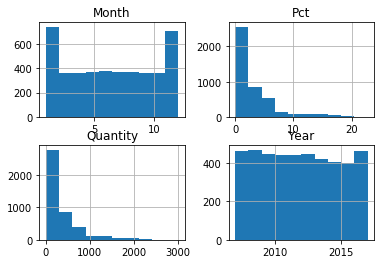

<Figure size 720x720 with 0 Axes>

In [60]:
df.hist()
plt.figure(figsize=(10,10))
plt.show()

NameError: name 'numpy' is not defined

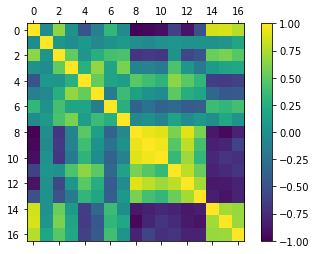

In [33]:
correlation=df1.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

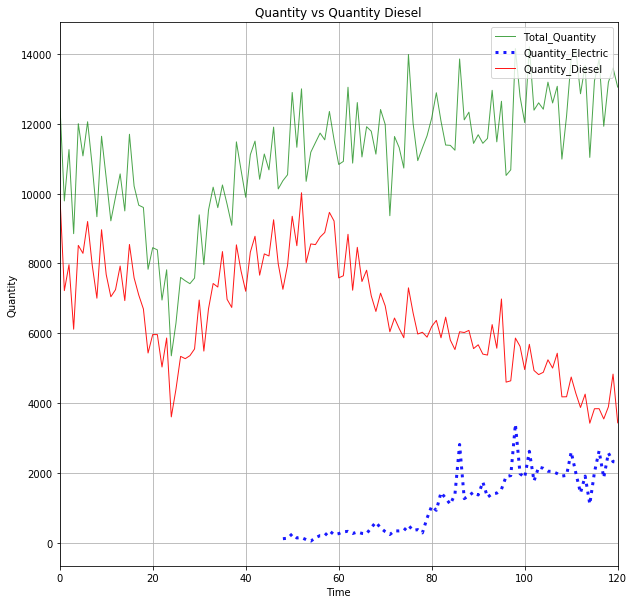

In [34]:
df1.Quantity.plot(x='Year', kind='line', color='green', label='Total_Quantity', linewidth=1, alpha=0.7, grid=True, linestyle='-',figsize=(10, 10))
df1.Quantity_Electric.plot(color='blue', label='Quantity_Electric', linewidth=3, alpha=0.9, grid=True, linestyle=':' )
df1.Quantity_Diesel.plot(color='red', label='Quantity_Diesel', linewidth=1, alpha=0.9, grid=True, linestyle='-')
plt.legend(loc='upper right')
plt.xlabel('Time')
plt.ylabel('Quantity')

plt.title('Quantity vs Quantity Diesel')
plt.show()

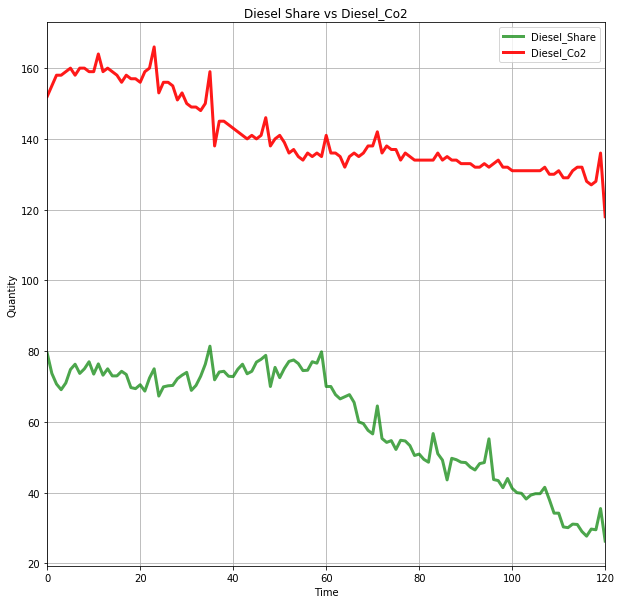

In [35]:
df1.Diesel_Share.plot(x='Year', kind='line', color='green', label='Diesel_Share', linewidth=3, alpha=0.7, grid=True, linestyle='-',
                           figsize=(10, 10))
df1.Diesel_Co2.plot(color='red', label='Diesel_Co2', linewidth=3, alpha=0.9, grid=True, linestyle='-')
plt.legend(loc='upper right')
plt.xlabel('Time')
plt.ylabel('Quantity')

plt.title('Diesel Share vs Diesel_Co2')
plt.show()

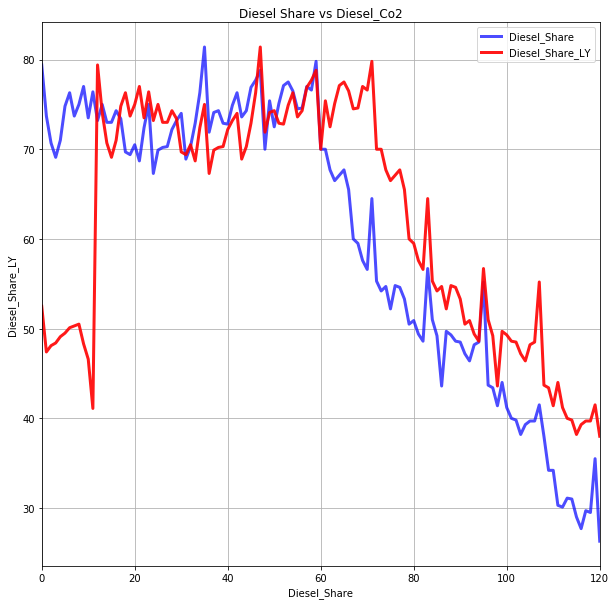

In [45]:
df1.Diesel_Share.plot(x='Year', kind='line', color='blue', label='Diesel_Share', linewidth=3, alpha=0.7, grid=True, linestyle='-',
                           figsize=(10, 10))
df1.Diesel_Share_LY.plot(color='red', label='Diesel_Share_LY', linewidth=3, alpha=0.9, grid=True, linestyle='-')
plt.legend(loc='upper right')
plt.xlabel('Diesel_Share')
plt.ylabel('Diesel_Share_LY')

plt.title('Diesel Share vs Diesel_Co2')
plt.show()

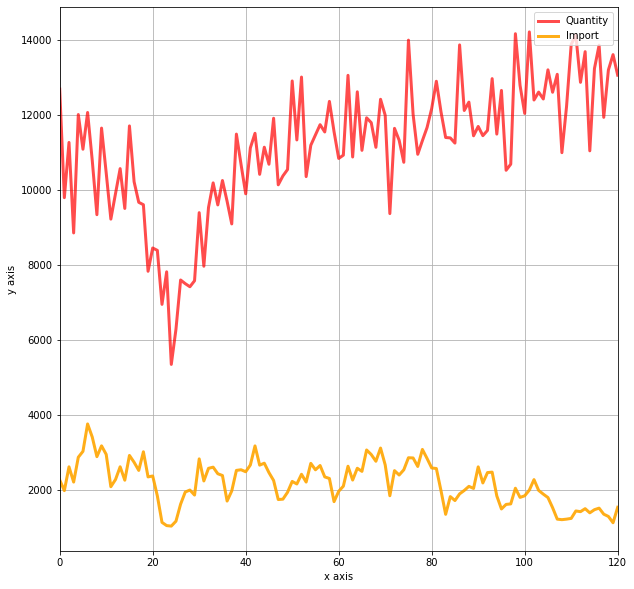

In [38]:
df1.Quantity.plot(x='Year', kind='line', color='red', label='Quantity', linewidth=3, alpha=0.7, grid=True, linestyle='-',
                           figsize=(10, 10))
df1.Import.plot(color='orange', label='Import', linewidth=3, alpha=0.9, grid=True, linestyle='-')
plt.legend(loc='upper right')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

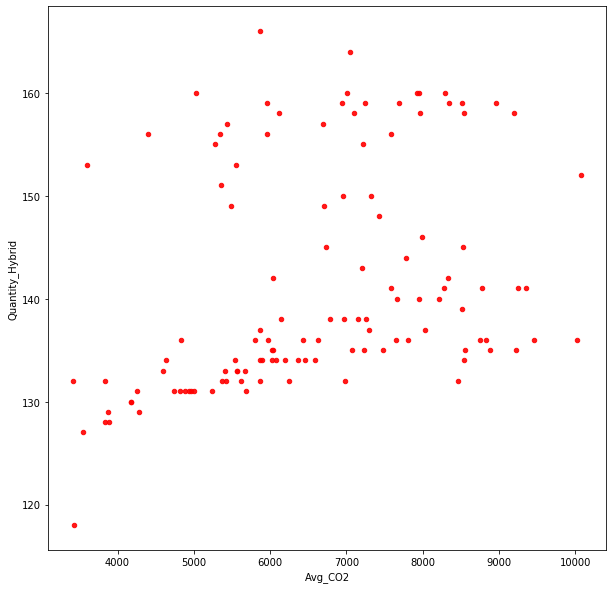

In [40]:
df1.plot(kind='scatter', x='Quantity_Diesel', y='Diesel_Co2', alpha=0.9, color='red', figsize=(10, 10))
plt.xlabel('Avg_CO2')
plt.ylabel('Quantity_Hybrid')
plt.show()

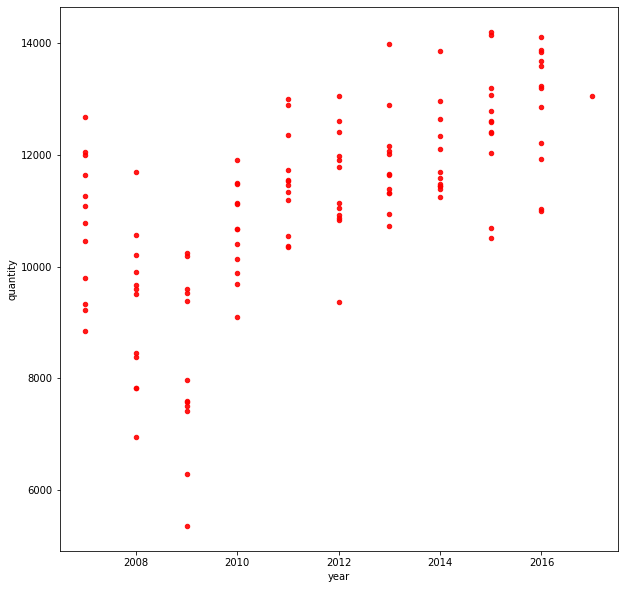

In [47]:
df1.plot(kind='scatter', x='Year', y='Quantity', alpha=0.9, color='red', figsize=(10, 10))
plt.xlabel('year')
plt.ylabel('quantity')
plt.show()

In [48]:
df1.columns

Index(['Year', 'Month', 'Quantity', 'Quantity_YoY', 'Import', 'Import_YoY',
       'Used', 'Used_YoY', 'Avg_CO2', 'Bensin_Co2', 'Diesel_Co2',
       'Quantity_Diesel', 'Diesel_Share', 'Diesel_Share_LY', 'Quantity_Hybrid',
       'Quantity_Electric', 'Import_Electric'],
      dtype='object')

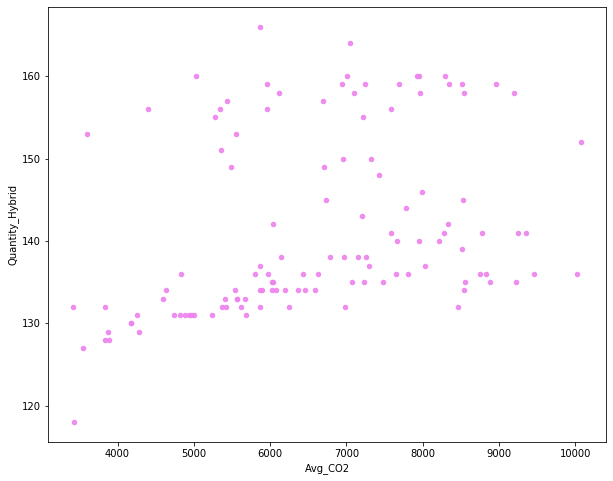

In [59]:
df1.plot(kind='scatter', x='Quantity_Diesel', y='Diesel_Co2', alpha=0.9, color='violet', figsize=(10,8))
plt.xlabel('Avg_CO2')
plt.ylabel('Quantity_Hybrid')
plt.show()


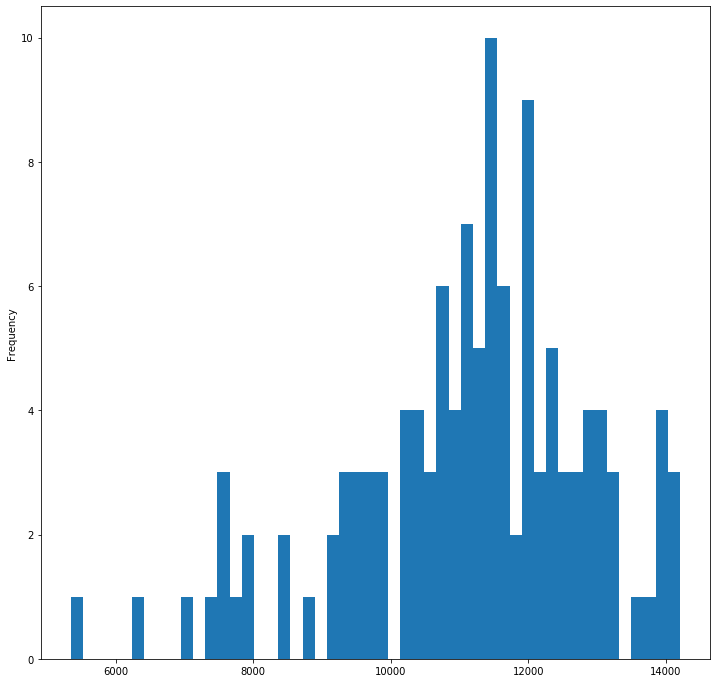

In [56]:
df1.Quantity.plot(kind = 'hist',bins = 50,figsize = (12,12))
plt.show()

In [91]:
import os
os.getcwd()

"C:\\Users\\Gottipati's"

In [94]:
df['Date'] = pd.to_datetime(df.assign(Day=1).loc[:, ['Year','Month','Day']])
type(df['Date'])

pandas.core.series.Series

In [97]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 17 columns):
Year                 121 non-null int64
Month                121 non-null int64
Quantity             121 non-null int64
Quantity_YoY         121 non-null int64
Import               121 non-null int64
Import_YoY           121 non-null int64
Used                 61 non-null float64
Used_YoY             49 non-null float64
Avg_CO2              121 non-null int64
Bensin_Co2           121 non-null int64
Diesel_Co2           121 non-null int64
Quantity_Diesel      121 non-null int64
Diesel_Share         121 non-null float64
Diesel_Share_LY      121 non-null float64
Quantity_Hybrid      73 non-null float64
Quantity_Electric    73 non-null float64
Import_Electric      53 non-null float64
dtypes: float64(7), int64(10)
memory usage: 16.2 KB


In [98]:
print(df1['Year'].value_counts(dropna=False))

2016    12
2015    12
2014    12
2013    12
2012    12
2011    12
2010    12
2009    12
2008    12
2007    12
2017     1
Name: Year, dtype: int64


In [ ]:
df1.boxplot(column='Avg_CO2',by='Import', figsize = (15,15))
plt.show()

In [105]:
all_data_na = (df1.isnull().sum() / len(df1)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio


In [104]:
## missing values imputation with higher frequence value form their reapective column

df1=df1.fillna(df1['Used_YoY'].value_counts().index[0])
df1=df1.fillna(df1['Import_Electric'].value_counts().index[0])
df1=df1.fillna(df1['Used'].value_counts().index[0])
df1=df1.fillna(df1['Quantity_Electric'].value_counts().index[0])
df1=df1.fillna(df1['Quantity_Hybrid'].value_counts().index[0])


In [192]:
#Taining and testing Linear model 
features=df1.columns.to_list()
print(list(features))
X = df1.drop(labels=['Quantity'], axis=1)
print(X)
Y=df1['Quantity']
print(Y)


['Year', 'Month', 'Quantity', 'Quantity_YoY', 'Import', 'Import_YoY', 'Used', 'Used_YoY', 'Avg_CO2', 'Bensin_Co2', 'Diesel_Co2', 'Quantity_Diesel', 'Diesel_Share', 'Diesel_Share_LY', 'Quantity_Hybrid', 'Quantity_Electric', 'Import_Electric']
     Year  Month  Quantity_YoY  Import  Import_YoY     Used  Used_YoY  \
1    2007      2          2448    1992         -89  -6261.0   -6261.0   
2    2007      3          1445    2626          45  -6261.0   -6261.0   
3    2007      4           504    2220        -130  -6261.0   -6261.0   
4    2007      5          1592    2881           7  -6261.0   -6261.0   
5    2007      6          1545    3038          23  -6261.0   -6261.0   
..    ...    ...           ...     ...         ...      ...       ...   
116  2016      9          1433    1526        -373  42780.0     236.0   
117  2016     10         -1265    1365        -443  39797.0   -1611.0   
118  2016     11           594    1305        -233  39721.0    2246.0   
119  2016     12           5

In [193]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)
Y_pred = linear_reg.predict(X_test)

In [198]:
print(linear_reg.intercept_)
print(linear_reg.coef_)

282748.36081265664
[-1.35120275e+02  6.64176800e+00  6.25077423e-03  2.89162191e-03
  2.41002368e-02  3.06354227e-04  3.49718814e-02 -4.32931289e+01
 -4.90928974e+00  4.57192106e+01  1.54554005e+00 -1.77861597e+02
  7.04678686e+00  1.61929112e-01 -1.64956345e-01 -5.05521694e-02]


In [201]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)
print(round(r2_score(Y_test,Y_pred)*100,2),'%')

98.62 %


In [203]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(Y_pred, Y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 224.9401


In [204]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(Y_pred, Y_test)
print(lin_mae)

187.57333069652344
